# TP noté HMMA238



## Exercice 1: Le jeu de la vie






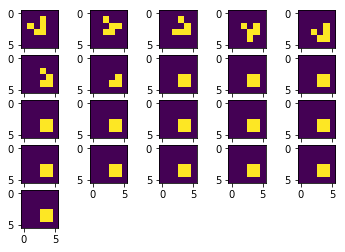

In [4]:
run utils.py.ipynb


In [5]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

N=calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La sortie de cette fonction calcule le nombre de voisins vivants de chaque cellule sous forme d'une liste représentant le plateau de jeu.

 Nous allons maintenant décrire et expliciter le fonctionnement et le but de la fonction iteration jeu qui nous a été fournie.

In [6]:
"Nous donnonscomme argument notre matrice du jeu de la vie à un tour n"

def iteration_jeu(Z):
    
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            "conditions de mort puis de naissance"
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z
"Nous récupérons notre matrice du jeu de la vie au tour n+1"

'Nous récupérons notre matrice du jeu de la vie au tour n+1'

Cette fonction permet de réaliser un tour du jeu de la vie à partir des valeurs du tour précédent (Z) et de la fonction calcul_nb_voisins. Cette fonction modifie directement  notre liste Z avec la mise à jour des cellules : soit la cellule survie, soit la cellule périt.

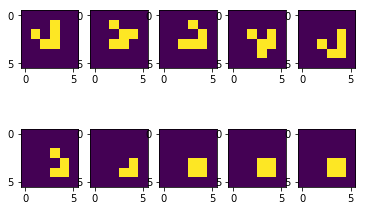

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Z2=list(Z)

plt.subplot(2,5,1)
plt.imshow(np.asarray(Z2))

for i in range(2,11):
    Z=iteration_jeu(Z2)
    plt.subplot(2,5,i)
    plt.imshow(np.asarray(Z2))

Entre l'itération 0 et 4, nous remarquons que plusieurs cellules vivent et meurt à chaque itération, cependant le nombre de cellules vivantes reste inchangé (au nombre de 5) à chaque fin de tour.  
À partir de l'itération 7 et ce jusqu'à l'itération 9, nous remarquons que le jeu est à l'équilibre. En effet, plus aucune cellule ne meurt ou ne naît. Cet équilibre se maintiendra peut importe le nombre de tour que nous réaliseront, le jeu est alors terminé, plus aucune évolution n'étant possible.

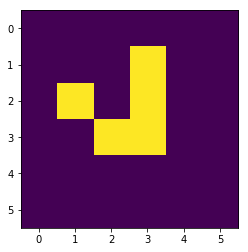

In [10]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]


import numpy as np
A=np.asarray(Z)
plt.imshow(A)

In [12]:
import time
from numba import jit

In [13]:
@jit
def iteration_jeu_nb(Z,n):
    
    affichage=(n//2)+1
    Z2=np.asarray(list(Z))
    plt.subplot(affichage,2,1)
    plt.imshow(np.asarray(Z2))

    for i in range(2,n+2):
        Z=iteration_jeu(Z2)
        plt.subplot(affichage,2,i)
        plt.imshow(Z2)
    return Z2

Temps écoulé avec la compilation de jit= 0.10994982719421387
Temps écoulé après la compilation de jit =0.007010221481323242


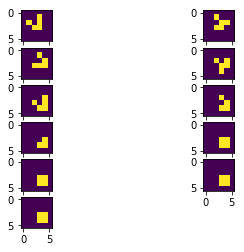

In [19]:

start = time.time()
iteration_jeu_nb(Z,10)
end = time.time()
print("Temps écoulé avec la compilation de jit = %s" % (end - start))


start = time.time()
iteration_jeu_nb(Z,10)
end = time.time()
print("Temps écoulé après la compilation de jit = %s" % (end - start))

### Question 8



In [20]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


In [24]:
import ipywidgets as ip

def iteration_jeu_nb2(n):
    
    affichage=(n//2)+1
    Z2=np.asarray(list(Z_huge))


    for i in range(2,n+2):
        iteration_jeu(Z2)
     
    plt.imshow(Z2)
    plt.show()

ip.interact(iteration_jeu_nb2, n=(1,2000,1));

interactive(children=(IntSlider(value=1000, description='n', max=2000, min=1), Output()), _dom_classes=('widge…

In [324]:
from __future__ import print_function
from ipywidgets import interact , interactive , fixed , interact_manual
import ipywidgets as widgets

In [328]:
def f(x):
    return x
interact(f, x=10);


10